Original Dataframe shape: (569, 31)
Inputs Dataframe Shape = (569, 30)


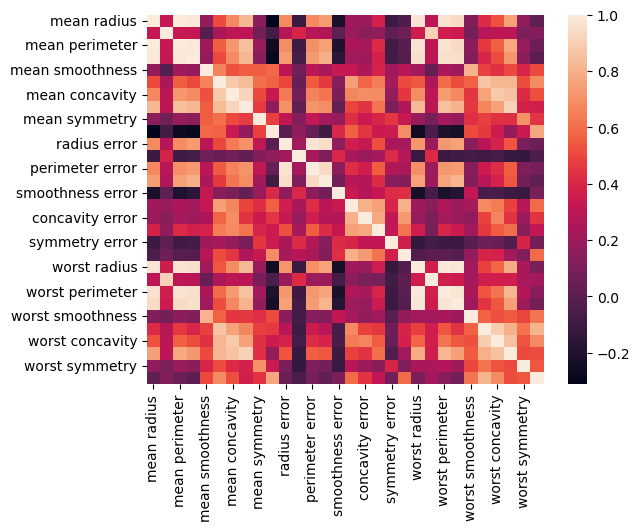

Eigenvalues shape: (30,)
Eigenvectors shape: (30, 30)


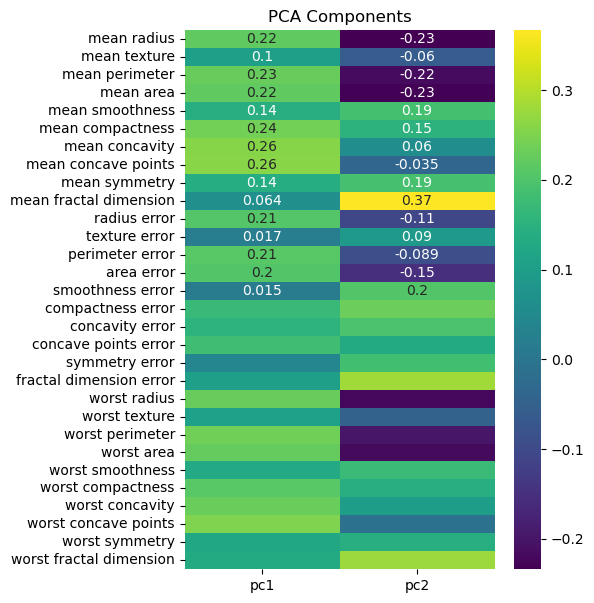

Number of components explaining 50% variance: 2
Eigenvalues: [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigenvalues shape: (30,)
Eigenvectors shape: (30, 30)


In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
cancer = load_breast_cancer(as_frame=True)
df = cancer.frame
print('Original Dataframe shape:', df.shape)
X = df.drop('target', axis=1)  # Select all features except the target variable
print('Inputs Dataframe Shape =', X.shape)
X_mean = X.mean()
X_std = X.std()
Z = (X - X_mean) / X_std
C = Z.corr()
sns.heatmap(C)
plt.show()
eigenvalues, eigenvectors = np.linalg.eig(C)
print("Eigenvalues shape:", eigenvalues.shape)
print("Eigenvectors shape:", eigenvectors.shape)
n_components = 2  # Define the number of components to select
u = eigenvectors[:, :n_components]
pca_components = pd.DataFrame(u, index=X.columns, columns=['pc1', 'pc2'])
plt.figure(figsize=(5, 7))
sns.heatmap(pca_components, annot=True, cmap='viridis')
plt.title('PCA Components')
plt.show()
explained_var = eigenvalues / eigenvalues.sum()
n_components_50 = np.argmax(explained_var.cumsum() > 0.50) + 1
print('Number of components explaining 50% variance:', n_components_50)
print('Eigenvalues:', eigenvalues)
print('Eigenvalues shape:', eigenvalues.shape)
print('Eigenvectors shape:', eigenvectors.shape)